# Hierarchical Clustering

### Loading Libraries

In [3]:
# Numerical Computing
import numpy as np
from numpy.random import uniform, seed

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation

# Warnings
import warnings

# SciPy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# Scikit-Learn
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

#IPython
from IPython.display import HTML

In [4]:
%matplotlib inline

In [21]:
sns.set_style('white')

cmap = ListedColormap(sns.xkcd_palette(['royal blue', 
                                        'medium green', 
                                        'orangered']))

In [22]:
# plt.rcParams['animation.ffmpeg_path'] = your_windows_path
plt.rcParams['animation.ffmpeg_args'] = '-report'
plt.rcParams['animation.bitrate'] = 2000

### Loading Iris Data

In [23]:
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Creating DataFrame

In [25]:
features = iris.feature_names

data = pd.DataFrame(data=np.column_stack([iris.data, iris.target]), 
                    columns=features + ['label'])

data.label = data.label.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Standardizing Data

In [26]:
# Scaler Model
scaler = StandardScaler()

# Fitting Scaler
features_standardized = scaler.fit_transform(data[features])
n = len(data)

#### Reducing Dimensionality to Visualize Clusters

In [27]:
# PCA Model
pca = PCA(n_components=2)

# Fitting Model
features_2D = pca.fit_transform(features_standardized)

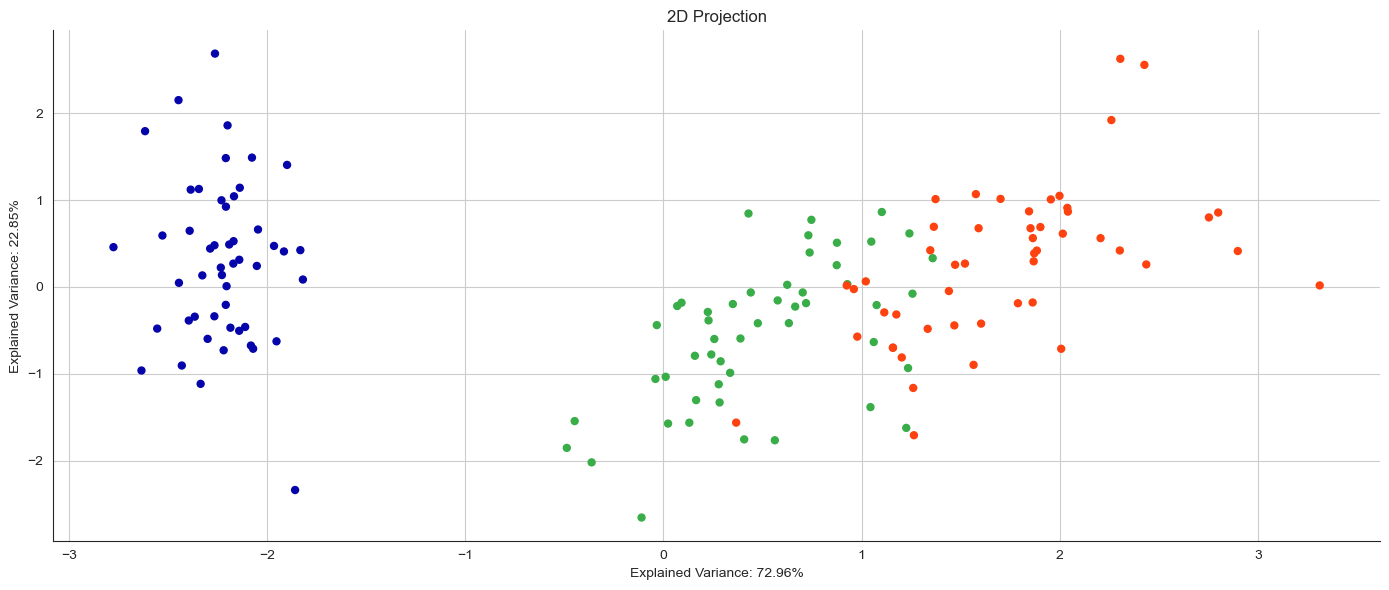

In [28]:
# ev1, ev2 = pca.explained_variance_ratio_

# ax = plt.figure(figsize=(14, 6)).gca(title='2D Projection',
#                                      xlabel=f'Explained Variance: {ev1:.2%}',
#                                      ylabel=f'Explained Variance: {ev2:.2%}')

fig = plt.figure(figsize=(14, 6))

ax = fig.gca()
ax.set_title('2D Projection')
ax.set_xlabel(f'Explained Variance: {ev1:.2%}')
ax.set_ylabel(f'Explained Variance: {ev2:.2%}')

ax.scatter(*features_2D.T, c=data.label, s=25, cmap=cmap)
sns.despine()
plt.tight_layout()
plt.grid(True)
plt.show()

### Performing Agglomerative Clustering

In [29]:
Z = linkage(features_standardized, 'ward')
Z[:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00]])

In [30]:
linkage_matrix = pd.DataFrame(data=Z, 
                              columns=['cluster_1', 'cluster_2', 
                                       'distance', 'n_objects'],
                              index=range(1, n))

for col in ['cluster_1', 'cluster_2', 'n_objects']:
    linkage_matrix[col] = linkage_matrix[col].astype(int)

linkage_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 1 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cluster_1  149 non-null    int64  
 1   cluster_2  149 non-null    int64  
 2   distance   149 non-null    float64
 3   n_objects  149 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 4.8 KB


In [31]:
linkage_matrix.head()

,cluster_1,cluster_2,distance,n_objects
1,101,142,0.000000,2
2,7,39,0.121168,2
3,10,48,0.121168,2
4,9,34,0.131632,2
5,0,17,0.131632,2


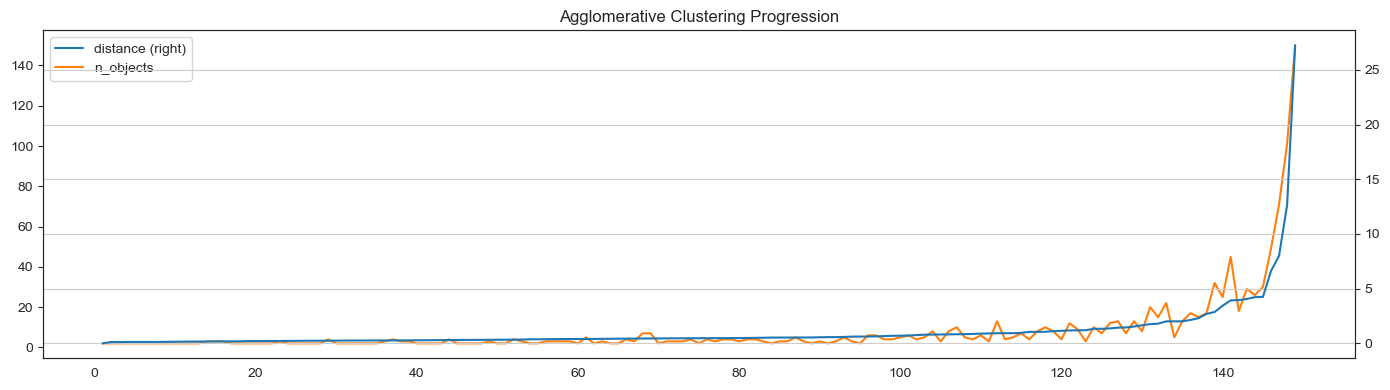

In [35]:
linkage_matrix[['distance', 'n_objects']].plot(secondary_y=['distance'],
                                               title='Agglomerative Clustering Progression',
                                               figsize=(14, 4))
plt.tight_layout();
plt.grid(True)
plt.show()

### Comparing Linkage Types

In [36]:
methods = ['single', 'complete', 'average', 'ward']

pairwise_distance = pdist(features_standardized)

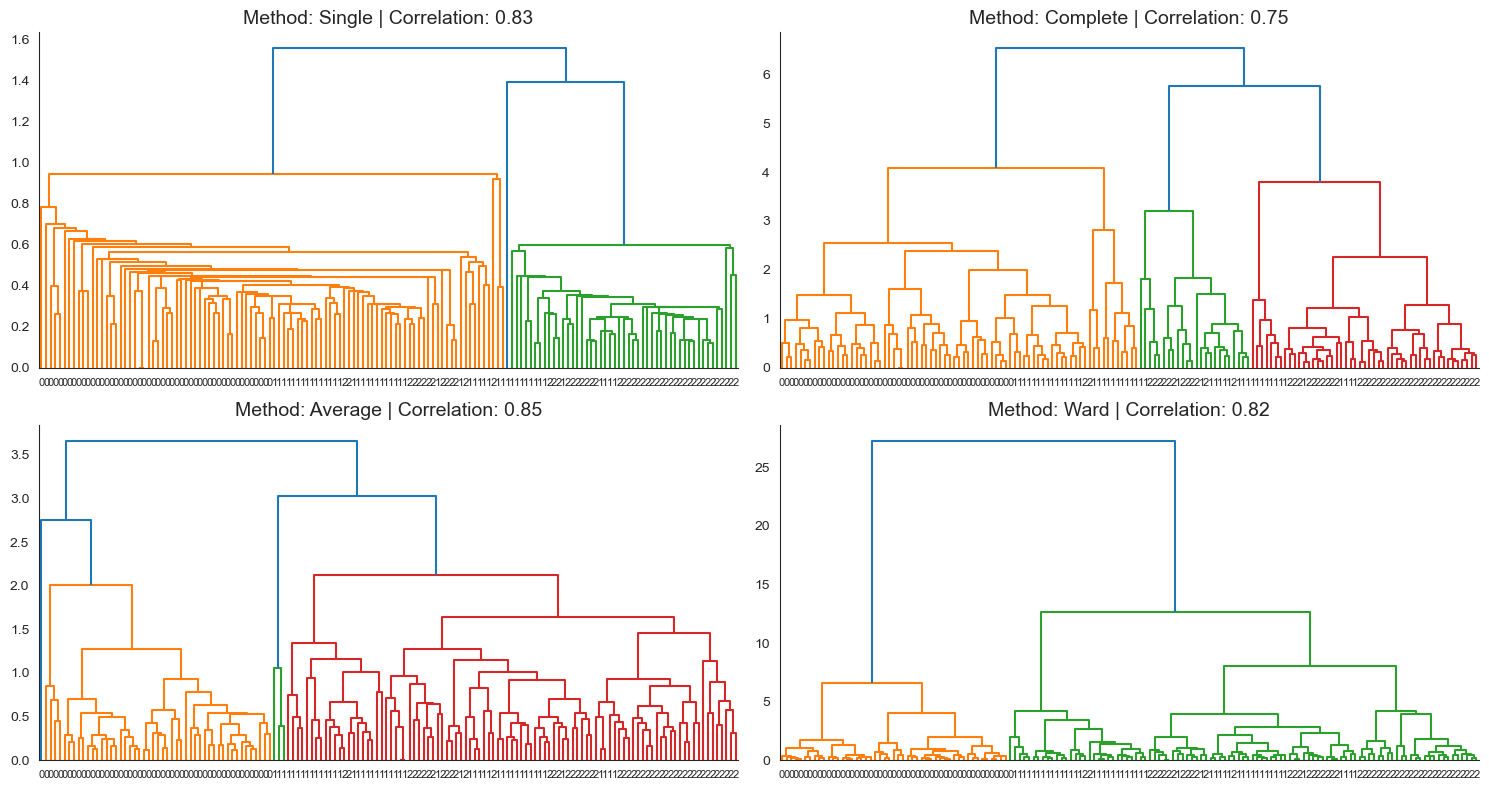

In [37]:
fig, axes = plt.subplots(figsize=(15, 8), nrows=2, ncols=2, sharex=True)

axes = axes.flatten()

for i, method in enumerate(methods):
    Z = linkage(features_standardized, method)
    c, coph_dists = cophenet(Z, pairwise_distance)
    dendrogram(Z,
               labels=data.label.values,
               orientation='top',
               leaf_rotation=0.,
               leaf_font_size=8.,
               ax=axes[i])
    axes[i].set_title(f'Method: {method.capitalize()} | Correlation: {c:.2f}',
                      fontsize=14)


sns.despine()
fig.tight_layout()
plt.show()

### Getting Cluster Members

In [38]:
n = len(Z)

from collections import OrderedDict
clusters = OrderedDict()

for i, row in enumerate(Z, 1):
    cluster = []
    for c in row[:2]:
        if c <= n:
            cluster.append(int(c))
        else:
            cluster += clusters[int(c)]
    clusters[n+i] = cluster

In [39]:
clusters[230]

[144, 124, 120, 143]

### Animate Agglomerative Clustering

In [40]:
def get_2D_coordinates():
    points = pd.DataFrame(features_2D).assign(n=1)
    return dict(enumerate(points.values.tolist()))

In [41]:
n_clusters = Z.shape[0]
points = get_2D_coordinates()
cluster_states = {0: get_2D_coordinates()}

for i, cluster in enumerate(Z[:, :2], 1):
    cluster_state = dict(cluster_states[i-1])
    merged_points = np.array([cluster_state.pop(c) for c in cluster])
    cluster_size = merged_points[:, 2]
    new_point = np.average(merged_points[:, :2],
                           axis=0,
                           weights=cluster_size).tolist()
    new_point.append(cluster_size.sum())
    cluster_state[n_clusters+i] = new_point
    cluster_states[i] = cluster_state

In [42]:
cluster_states[100]

{15: [-2.2622145316010216, 2.686284485110592, 1.0],
 41: [-1.8581224563735714, -2.3374151575533477, 1.0],
 60: [-0.11019628000062896, -2.654072818536564, 1.0],
 62: [0.5621083064431789, -1.7647243806169448, 1.0],
 106: [0.3670176878607247, -1.5615028914765061, 1.0],
 108: [2.006686467676606, -0.711438653547159, 1.0],
 109: [2.2597773490125004, 1.9210103764598858, 1.0],
 114: [1.4676452010173244, -0.4422715873770828, 1.0],
 176: [0.2871152207537314, -0.24204262329732337, np.float64(2.0)],
 179: [-2.2058211672986983, -0.09844552008358015, np.float64(2.0)],
 185: [0.9688104990917797, 0.019079153840815297, np.float64(3.0)],
 194: [0.7389335833626243, 0.6838170188840104, np.float64(2.0)],
 197: [2.3691965862739504, 0.33967500639352805, np.float64(2.0)],
 198: [-2.4657912495857985, -0.9936714816693254, np.float64(3.0)],
 205: [1.9290326043911588, 0.5634757376107673, np.float64(3.0)],
 206: [-1.9303546578375992, 0.4980362956076001, np.float64(3.0)],
 208: [-2.33244100242783, 0.105992329410891

### Set Animation Up

In [43]:
%%capture
fig, ax = plt.subplots(figsize=(14, 6))
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

sns.despine()
xmin, ymin = np.min(features_2D, axis=0) * 1.1
xmax, ymax = np.max(features_2D, axis=0) * 1.1
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

In [46]:
# scat = ax.scatter([], [])


# def animate(i):
#     df = pd.DataFrame(cluster_states[i]).values.T
#     scat.set_offsets(df[:, :2])
#     scat.set_sizes((df[:, 2] * 2) ** 2)
#     return scat,


# anim = FuncAnimation(fig,
#                      animate,
#                      frames=cluster_states.keys(),
#                      interval=250,
#                      blit=False)

# HTML(anim.to_html5_video())

### Scikit-Learn Implementation

In [47]:
clusterer = AgglomerativeClustering(n_clusters=3)

data['clusters'] = clusterer.fit_predict(features_standardized)

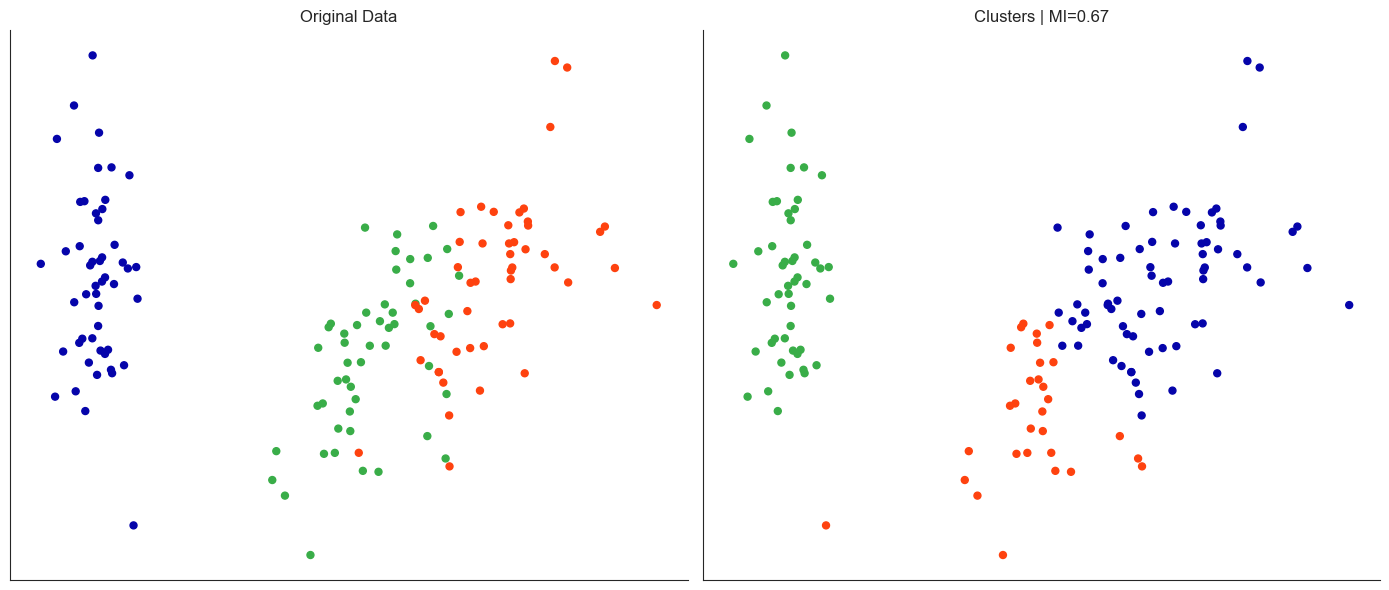

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

labels, clusters = data.label, data.clusters
mi = adjusted_mutual_info_score(labels, clusters)

axes[0].scatter(*features_2D.T, 
                c=data.label, 
                s=25, 
                cmap=cmap)
axes[0].set_title('Original Data')
axes[1].scatter(*features_2D.T, 
                c=data.clusters, 
                s=25, 
                cmap=cmap)
axes[1].set_title('Clusters | MI={:.2f}'.format(mi))
for i in [0, 1]:
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)

sns.despine()
fig.tight_layout()
# plt.grid(True)
plt.show()

### Comparing Mutual Information for Different Linkage Options

In [55]:
mutual_info = {}

for linkage_method in ['ward', 'complete', 'average']: 
    clusterer = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    clusters = clusterer.fit_predict(features_standardized)  
    mutual_info[linkage_method] = adjusted_mutual_info_score(clusters, labels)

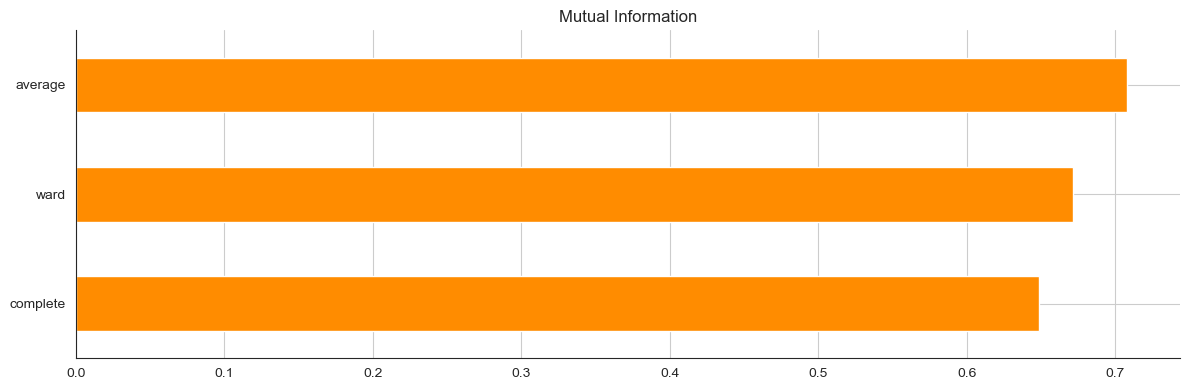

In [61]:
ax = (pd.Series(mutual_info)
      .sort_values()
      .plot.barh(figsize=(12, 4),
                 title='Mutual Information', color='darkorange'))
sns.despine()
plt.tight_layout()
plt.grid(True)
plt.show()